<a href="https://colab.research.google.com/github/Shrutikapedamkar/sentiment-analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk
from google.colab import drive

In [2]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [3]:
#Prompt google drive for authorization
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df_Reviews=pd.read_csv('/content/drive/MyDrive/Sentiment Analysis/Reviews.csv')
df_Reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
print(df_Reviews.shape)

(568454, 10)


# **EDA**

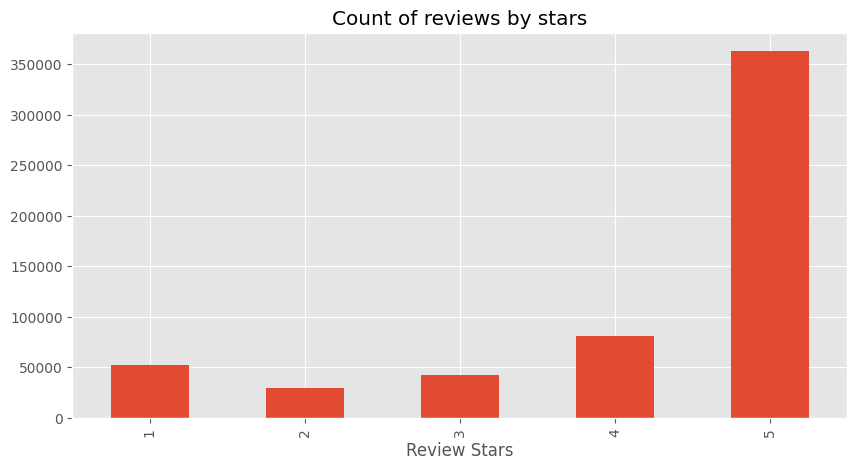

In [6]:
axis = df_Reviews['Score'].value_counts().sort_index() \
        .plot(kind='bar',
              title='Count of reviews by stars',
              figsize=(10,5))
axis.set_xlabel('Review Stars')
plt.show()

In [7]:
example = df_Reviews['Text'][10]
print(example)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


In [8]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['I', 'do', "n't", 'know', 'if', 'it', "'s", 'the', 'cactus', 'or']

In [9]:
# Find part of speech for each of the words
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('I', 'PRP'),
 ('do', 'VBP'),
 ("n't", 'RB'),
 ('know', 'VB'),
 ('if', 'IN'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('the', 'DT'),
 ('cactus', 'NN'),
 ('or', 'CC')]

In [10]:
#Taking the tagged part of the speech and put them as entities
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  I/PRP
  do/VBP
  n't/RB
  know/VB
  if/IN
  it/PRP
  's/VBZ
  the/DT
  cactus/NN
  or/CC
  the/DT
  tequila/NN
  or/CC
  just/RB
  the/DT
  unique/JJ
  combination/NN
  of/IN
  ingredients/NNS
  ,/,
  but/CC
  the/DT
  flavour/NN
  of/IN
  this/DT
  hot/JJ
  sauce/NN
  makes/VBZ
  it/PRP
  one/CD
  of/IN
  a/DT
  kind/NN
  !/.
  We/PRP
  picked/VBD
  up/RP
  a/DT
  bottle/NN
  once/RB
  on/IN
  a/DT
  trip/NN
  we/PRP
  were/VBD
  on/IN
  and/CC
  brought/VBD
  it/PRP
  back/RP
  home/NN
  with/IN
  us/PRP
  and/CC
  were/VBD
  totally/RB
  blown/VBN
  away/RB
  !/.
  When/WRB
  we/PRP
  realized/VBD
  that/IN
  we/PRP
  simply/RB
  could/MD
  n't/RB
  find/VB
  it/PRP
  anywhere/RB
  in/IN
  our/PRP$
  city/NN
  we/PRP
  were/VBD
  bummed./JJ
  </NNP
  br/NN
  //NNP
  >/NNP
  </NNP
  br/NN
  //NNP
  >/NNP
  Now/RB
  ,/,
  because/IN
  of/IN
  the/DT
  magic/NN
  of/IN
  the/DT
  internet/NN
  ,/,
  we/PRP
  have/VBP
  a/DT
  case/NN
  of/IN
  the/DT
  sauce/NN
  and/CC
  are/VBP


# **SENTIMENT ANALYSIS**

1. VADER (Valence Aware Dictionary and Sentiment Reasoner) technique

Takes all the workds in the sentence and each word has either positive, negative or neutral using SentimentIntensityAnalyzer and then finds the sum of the sentence.

Stopwords are removed.

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [12]:
SIA = SentimentIntensityAnalyzer()

In [13]:
#Checking polarity score of the example text
SIA.polarity_scores(example)

{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [14]:
#Dictionary to store polarity score of each review
score = {}
#Running polarity score on the entire dataset
for i, row in tqdm(df_Reviews.iterrows(), total = len(df_Reviews)):
  text = row['Text']
  myID = row['Id']
  score[myID] = SIA.polarity_scores(text)


  0%|          | 0/568454 [00:00<?, ?it/s]

In [15]:
#Displaying score of all the reviews
score

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [16]:
#Store the result (negative, neutral, positive) as a dataframe
vader = pd.DataFrame(score).T

In [17]:
vader = vader.reset_index().rename(columns = {'index' : 'Id'})
#left merge the actual review dataframe with the vader output
vader = vader.merge(df_Reviews, how = 'left')

In [18]:
vader.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


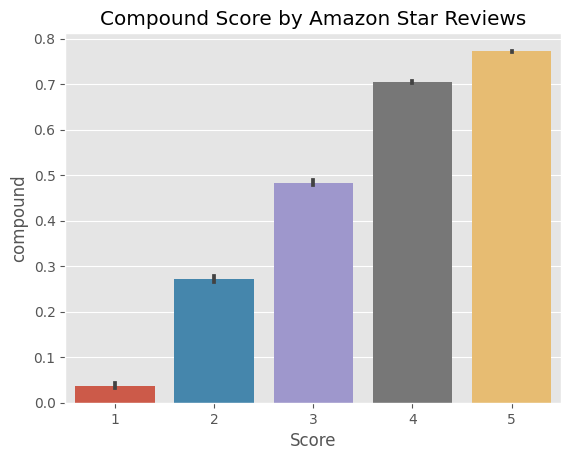

In [19]:
ax = sns.barplot(data=vader, x='Score', y='compound')
ax.set_title('Compound Score by Amazon Star Reviews')
plt.show()

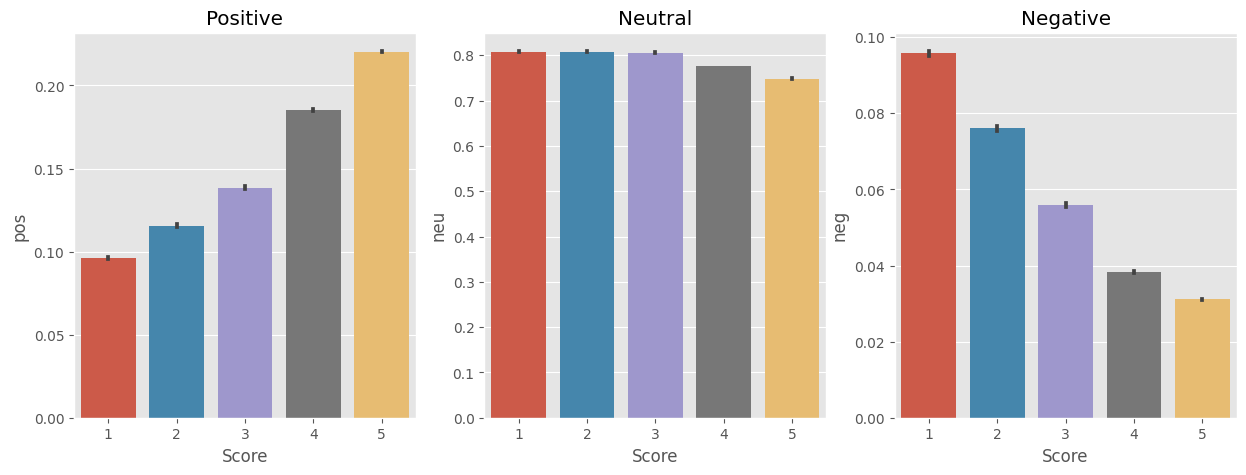

In [20]:
fig, axs = plt.subplots(1,3, figsize=(15,5))
sns.barplot(data=vader, x='Score', y='pos', ax=axs[0])
sns.barplot(data=vader, x='Score', y='neu', ax=axs[1])
sns.barplot(data=vader, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

# 2. Roberta Pretrained Model

Vader scores each word, finds the polarity score and the determines if the sentence is positive or negative. But in sentiment analysis, relationship between words is also important.

Roberta is a transformer based deep learning model which also analyzes the context and the relationship between words.

In [23]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [24]:
#This model is pretrained on a bunch of data for sentiment. This is provided by hugging face.
#When we run the AutoTokenizer in AutoModelForSequenceClassification and load it from a pre-trained model
#It'll pull down the model weights thats already stored.
#This is transfer learning as thsi model was trained on a bunch of twitter comments that were labeled
#We dont have to retrain the model. We will use the trained weights and apply to our dataset.
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [25]:
#VADER output on example text
print(example)
SIA.polarity_scores(example)

I don't know if it's the cactus or the tequila or just the unique combination of ingredients, but the flavour of this hot sauce makes it one of a kind!  We picked up a bottle once on a trip we were on and brought it back home with us and were totally blown away!  When we realized that we simply couldn't find it anywhere in our city we were bummed.<br /><br />Now, because of the magic of the internet, we have a case of the sauce and are ecstatic because of it.<br /><br />If you love hot sauce..I mean really love hot sauce, but don't want a sauce that tastelessly burns your throat, grab a bottle of Tequila Picante Gourmet de Inclan.  Just realize that once you taste it, you will never want to use any other sauce.<br /><br />Thank you for the personal, incredible service!


{'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746}

In [26]:
#Roberta model
#Applying tokenizer to the encoded text
encoded_text = tokenizer(example, return_tensors='pt' )
encoded_text

{'input_ids': tensor([[    0,   100,   218,    75,   216,   114,    24,    18,     5,   740,
         33028,    50,     5,  3055, 27224,    50,    95,     5,  2216,  4069,
             9,  7075,     6,    53,     5, 24253,     9,    42,  2131,  8929,
           817,    24,    65,     9,    10,   761,   328,  1437,   166,  2738,
            62,    10,  7304,   683,    15,    10,  1805,    52,    58,    15,
             8,  1146,    24,   124,   184,    19,   201,     8,    58,  4940,
         12315,   409,   328,  1437,   520,    52,  5426,    14,    52,  1622,
          1705,    75,   465,    24,  4558,    11,    84,   343,    52,    58,
         29673,  4567, 49069,  3809,  1589, 49007,  3809, 48709,  5975,     6,
           142,     9,     5,  8375,     9,     5,  2888,     6,    52,    33,
            10,   403,     9,     5,  8929,     8,    32, 30754,   142,     9,
            24, 49069,  3809,  1589, 49007,  3809, 48709,  1106,    47,   657,
          2131,  8929,  7586,   100,  

In [27]:
#Run the encoded text on our model
output = model(**encoded_text)
output

SequenceClassifierOutput(loss=None, logits=tensor([[-1.5658, -0.2539,  2.2960]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [28]:
  #Store in score as a numpy array
  scores = output[0][0].detach().numpy()
  scores = softmax(scores)
  scores

array([0.0191341 , 0.07104441, 0.9098215 ], dtype=float32)

In [29]:
scores_dictonary = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
}

print(scores_dictonary)

{'roberta_neg': 0.0191341, 'roberta_neu': 0.07104441, 'roberta_pos': 0.9098215}


In [30]:
 def roberta_polarity_scores(example):
    encoded_text = tokenizer(example, return_tensors='pt' )
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dictonary = {
      'roberta_neg' : scores[0],
      'roberta_neu' : scores[1],
      'roberta_pos' : scores[2]
    }
    return scores_dictonary

In [31]:
result={}
for i, row in tqdm(df_Reviews.iterrows(), total=500):
  try:
    text = row['Text']
    myid = row['Id']
    vader_result = SIA.polarity_scores(text)
    vader_result_rename = {}
    for key, value in vader_result.items():
      vader_result_rename[f'vader_{key}'] = value
    roberta_result = roberta_polarity_scores(text)
    #Combining bother vader and roberta results dictionary
    combine = {**vader_result, **roberta_result}
    result[myid] = combine
  except RuntimeError:
    print(f'Broke for Id {myid}')


  0%|          | 0/500 [00:00<?, ?it/s]

Broke for Id 83
Broke for Id 187
Broke for Id 529
Broke for Id 540
Broke for Id 746
Broke for Id 863


KeyboardInterrupt: ignored

In [32]:
  combine = {**vader_result, **roberta_result}
  combine

{'neg': 0.162,
 'neu': 0.796,
 'pos': 0.042,
 'compound': -0.943,
 'roberta_neg': 0.0036145211,
 'roberta_neu': 0.052905012,
 'roberta_pos': 0.94348043}

In [33]:
results_df = pd.DataFrame(result).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df_Reviews, how='left')

## **Compare Scores Between models**

In [34]:
results_df.columns


Index(['Id', 'neg', 'neu', 'pos', 'compound', 'roberta_neg', 'roberta_neu',
       'roberta_pos', 'ProductId', 'UserId', 'ProfileName',
       'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time',
       'Summary', 'Text'],
      dtype='object')

# **Combine & compare**

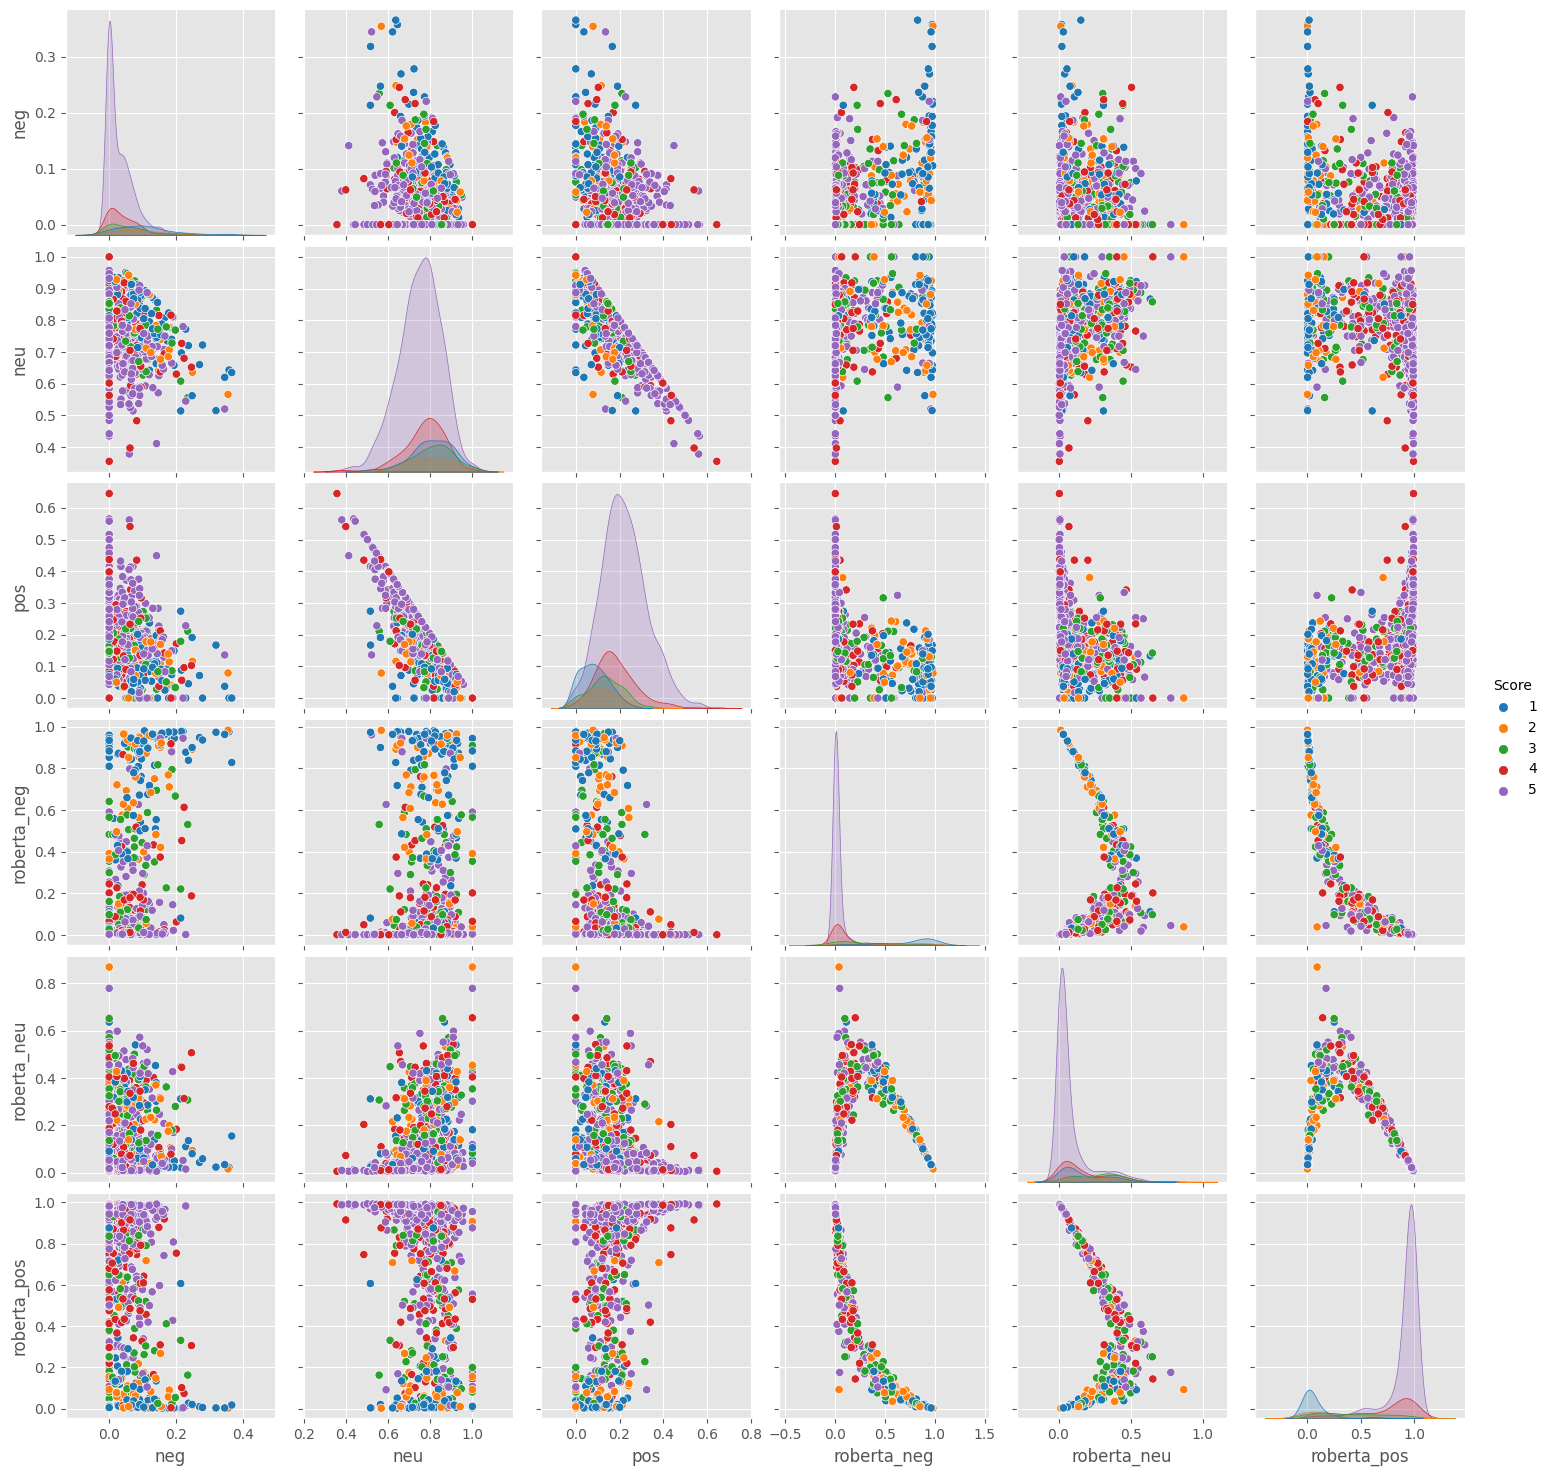

In [35]:
sns.pairplot(data=results_df,
             vars=['neg', 'neu', 'pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')
plt.show()

# **Example**

In [36]:
results_df.query('Score == 1') \
    .sort_values('roberta_pos', ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [37]:
results_df.query('Score == 1') \
    .sort_values('pos', ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [38]:
results_df.query('Score == 5') \
    .sort_values('roberta_neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [39]:
results_df.query('Score == 5') \
    .sort_values('neg', ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

# Transformers Pipeline

In [40]:
from transformers import pipeline

sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [41]:
sent_pipeline('I love sentiment analysis!')


[{'label': 'POSITIVE', 'score': 0.9997853636741638}]

In [42]:
sent_pipeline('It was a nice and bright day')


[{'label': 'POSITIVE', 'score': 0.9998766183853149}]

In [43]:
sent_pipeline('Such a shitty weather')


[{'label': 'NEGATIVE', 'score': 0.9997989535331726}]

In [44]:
sent_pipeline('She is crazy')


[{'label': 'NEGATIVE', 'score': 0.944306492805481}]